# Exercise sheet 10
### Due 27/01/2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm    # Normal distribution, if you need it.
                                # To fit a Gaussian to a data array:
                                # mu, sigma = norm.fit(data_array)

#### Consider again the egg crate function that we discussed earlier in the lecture.

In [2]:
def egg_crate(x,y):
    """Egg crate surface as a function of independent varaibles x and y. 
    """
    z = x ** 2 + y ** 2 + 25 * (np.sin(x) ** 2 + np.sin(y) ** 2)
    return z

In [3]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y)
Z = egg_crate(X,Y)        # Note that my funtion can be applied to
                          # numpy arrays of x and y values!
print (Z.shape)

(100, 100)


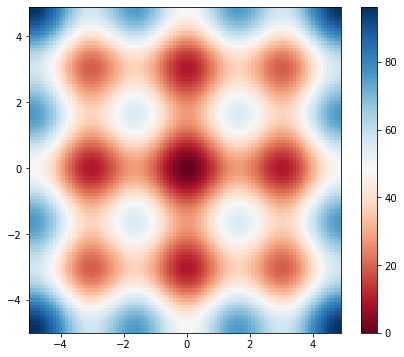

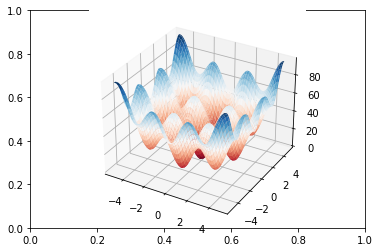

In [4]:
def plot_heat(X=X, Y=Y, Z=Z):
    """Plot the heat map of variable Z as a function of variables X and Y.
    """
    fig, ax = plt.subplots(figsize=(7,6))
    c = ax.pcolormesh(X, Y, Z, cmap='RdBu', vmin=np.min(Z), vmax=np.max(Z))
    fig.colorbar(c, ax=ax)
    plt.axis([np.min(X), np.max(X), np.min(Y), np.max(Y)])
    
# Plot heat map
plot_heat()                                

# Plot 3D surface
fig, ax = plt.subplots(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='RdBu')      


Our goal is to find the positions of all the local minima of the function inside this square.

For that, we're going to be implementing an extremely simple yet effective algorithm based on random walkers.

We start with 100 randomly positioned walkers, with coordinates `xguess` and `yguess` between -4 and 4:

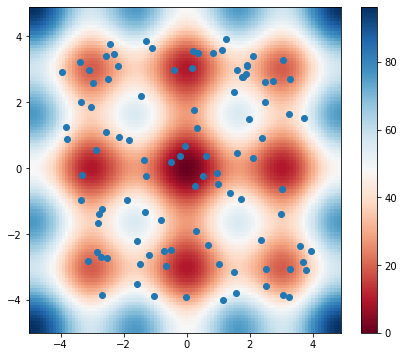

In [5]:
NPOINTS = 100

xvals = np.random.uniform(-4, 4, NPOINTS)
yvals = np.random.uniform(-4, 4, NPOINTS)

plot_heat()

plt.scatter(xvals, yvals)

plt.show()

Now, we create a "stepping" function:

In [6]:
def random_steps(npoints, maxstep=0.05):
    '''
    Create an array with length `npoints` containing 
    random steps of maximum size `maxstep`.
    '''
    steps = np.random.uniform(-maxstep, maxstep, npoints)
    return steps

And we check if it works:

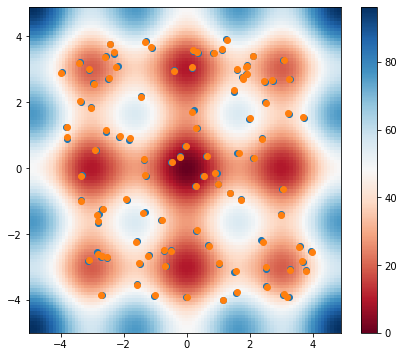

In [7]:
plot_heat()
plt.scatter(xvals, yvals)         # Old positions in blue

x_newvals = xvals + random_steps(NPOINTS) # Apply random steps to x values
y_newvals = yvals + random_steps(NPOINTS) # Apply random steps to y values

plt.scatter(x_newvals, y_newvals) # New positions in orange


We must now make every walker reach its closest local minimum.

There are many ways to achieve this. Below we guide you through one of the simplest possible algorithms:

1) Create two arrays `xvals`, `yvals` representing the position of 100 random walkers. Calculate an array of $z$ values of the `egg_crate` function at those positions.

2) Make all your 100 walkers take one random step and store the new positions in new x and y arrays, like we did above. Now evaluate the `egg_crate` function also in these new positions.

3) Now we must compare the new function values with the old ones. Create an array `delta` with the differences between the $z$ values in the new positions and those in the old positions.

4) For the walkers whose function value is lower in the new position ($\delta_i<0$), replace the old position with the new one (i.e. accept the step). For those cases where the function value is higher, stay in the old position (we only want to walk downwards, so in this case we don't walk).

5) Embed the steps 1-4 in a loop that repeats 500 times. 

6) Now scatter the final positions of your walkers over a heat map of the function, like we did above. The points should now all have fallen in the bottom of the egg crates, and you have found all your local minima.

7) Can you find a way to estimate of the x-values of the minima, within a given uncertainty?

8) The actual x and y positions of the minima are `[-3.01960, 0, 3.01960]`. What is the relative error of your estimate?


*Hint 1: with this method you should be able to find the positions of the minima with an error of ~0.01%*

*Hint 2: don't be tempted to use loops for steps 3 and 4: numpy arrays offer you much more pythonic, one-line solutions!*